# Air Voids

In [2]:
#%% IMPORTS
#BASICS
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import absolute
from pandas.plotting import scatter_matrix
from sklearn.pipeline import make_pipeline
from IPython.display import display, Markdown, Latex
pd.options.display.max_columns = None

#STATISTICS
from scipy.stats import normaltest
from scipy import stats

#ML TRAINING AND DATA PREPROCESSING
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PolynomialFeatures

#ML MODELS
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from xgboost import plot_importance

#MODEL EVALUATION
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_predict

#METRICS
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## 1. Methods 

In [3]:
#Eliminate Outliers based on the interquantile
#datFrame: Data frame where the outliers will be eliminated.
#columnName: the name of the column where the outliers will be identified.
def eliminateOutliers (dataFrame, columnName):
    Q1 = dataFrame[columnName].quantile(0.25)
    Q3 = dataFrame[columnName].quantile(0.75)
    IQR = Q3 - Q1
    print('Initial dataframe size: '+str(dataFrame.shape))
    dataFrame = dataFrame[(dataFrame[columnName] < (Q3 + 1.5 * IQR)) & (dataFrame[columnName] > (Q1 - 1.5 * IQR))]
    print('Final dataframe size: '+str(dataFrame.shape))
    return dataFrame

In [4]:
# Create the boxplot graphs for the categorical variables
# dataFrame: Data frame associated to the property of interest (dfAirVoids, dfMS, dfMF, dfITS, dfTSR)
# propertyOfInterest: the name of the column where the property of interest is located.
# columnName1...4: The categorical columns to evaluate.
def displayBoxPlotGraphs (dataFrame, propertyOfInterest, columnName1, columnName2, columnName3, columnName4):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
    sns.boxplot(y = propertyOfInterest, x = columnName1, data=dataFrame,  orient='v' , ax=ax1)
    sns.boxplot(y = propertyOfInterest, x = columnName2, data=dataFrame,  orient='v' , ax=ax2)
    sns.boxplot(y = propertyOfInterest, x= columnName3, data=dataFrame,  orient='v' , ax=ax3)
    sns.boxplot(y= propertyOfInterest, x= columnName4, data=dataFrame,  orient='v' , ax=ax4)

##  2. Data Import 

In [5]:
#%%DATA READING AND INITIAL PREPROCESSING
numericColumns = ['Aggregate absorption (%)',
                  'Apparent specific gravity',
                    0.075,
                    0.3,
                    0.6,
                    2.36,
                    4.75,
                    9.5,
                    12.5,
                    19,
                    'Plastic particle size (mm)',
                    'Mixing speed (RPM)',
                    'Mixing Temperature',
                    'Mixing Time (hours)',
                    'Plastic Addition by bitumen weight (%)',
                    'Bitumen content in the sample'
                    ]
categoricalColumns = ['Modified asphalt Mix?',
                      'Agreggate Type',
                    'Aggregate absorption [%]',
                    'Filler used',
                    'Consolidated bitumen penetration grade',
                    'New Plastic Type',
                    'Plastic pretreatment',
                    'Plastic shape',
                    'Plastic Size',
                    'Mixing Process',
                    'Aggregates replacement ?',
                    'Bitumen replacement?',
                    'Filler replacement',
                    'Property',
                    'Units']
#It returns the dataframe of interes based on the property - 'AirVoids', 'MS', 'MF', 'ITS', 'TSR'
def returnDf (propertyOfInterest):
    df = pd.read_excel('fileML.xlsx', sheet_name = propertyOfInterest, engine='openpyxl')
    df = df.set_index(propertyOfInterest + ' ID')
    df.loc[:,:'Units'] = df.loc[:,:'Units'].applymap(str)
    df.loc[:,:'Units'] = df.loc[:,:'Units'] .applymap(str.strip)
    df.replace('NS', np.nan, inplace = True)
    df[numericColumns] = df[numericColumns].replace('N/a', 0).astype(float)
    df.columns = df.columns.astype(str)
    return df

In [13]:
dfAirVoids = returnDf('AirVoids')

## 3. 🧐Data Exploration
###  3.1 Total Sample

In [6]:
dfAirVoids = eliminateOutliers(dfAirVoids, 'Air voids of the sample (%)')

Initial dataframe size: (305, 34)
Final dataframe size: (288, 34)


In [14]:
dfAirVoids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 1 to 305
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Article ID                              305 non-null    object 
 1   Global ID                               305 non-null    object 
 2   Modified asphalt Mix?                   305 non-null    object 
 3   Agreggate Type                          205 non-null    object 
 4   Aggregate absorption (%)                237 non-null    float64
 5   Apparent specific gravity               79 non-null     float64
 6   0.075                                   269 non-null    float64
 7   0.3                                     269 non-null    float64
 8   0.6                                     266 non-null    float64
 9   2.36                                    273 non-null    float64
 10  4.75                                    273 non-null    float6

In [15]:
columnsOfInteres = numericColumns[0:2]+numericColumns[10:]+['Air voids of the sample (%)']

In [16]:
dfAirVoids.describe(include = 'all')

,Article ID,Global ID,Modified asphalt Mix?,Agreggate Type,Aggregate absorption (%),Apparent specific gravity,0.075,0.3,0.6,2.36,4.75,9.5,12.5,19,Filler used,Bitumen Type Penetration Grade,Consolidated bitumen penetration grade,New Plastic Type,Plastic pretreatment,Plastic shape,Plastic Size,Plastic particle size (mm),Mixing Process,Mixing speed (RPM),Mixing Temperature,Mixing Time (hours),Aggregates replacement ?,Bitumen replacement?,Filler replacement,Plastic Addition by bitumen weight (%),Property,Units,Bitumen content in the sample,Air voids of the sample (%)
count,305,305,305,205,237.000000,79.000000,269.000000,269.00000,266.000000,273.000000,273.000000,266.000000,258.000000,273.000000,132,305,305,281,305,305,261,251.000000,305,290.000000,298.000000,290.000000,305,305,305,305.000000,305,305,305.000000,305.000000
unique,28,305,2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6,3,8,3,4,4,NaN,3,NaN,NaN,NaN,2,2,1,NaN,1,1,NaN,NaN
top,19,281,Yes,Granite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stone dust,50/70,50/70,PE,Physical,Shredded,Fine,NaN,Dry,NaN,NaN,NaN,No,No,No,NaN,Air Voids,%,NaN,NaN
freq,70,1,241,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,119,214,135,161,204,95,NaN,142,NaN,NaN,NaN,299,290,305,NaN,305,305,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.113819,2.706203,5.367472,13.03803,20.222218,36.018864,48.102527,66.324812,78.130116,91.661172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.014701,NaN,726.137931,47.583893,0.143655,NaN,NaN,NaN,15.360045,NaN,NaN,5.121121,4.258557
std,NaN,NaN,NaN,NaN,0.901977,0.066591,1.437309,3.44642,6.382403,7.256635,9.094616,10.704868,11.154531,7.346771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.504356,NaN,1437.703708,71.575827,0.355302,NaN,NaN,NaN,29.316095,NaN,NaN,0.817212,1.577934
min,NaN,NaN,NaN,NaN,0.130000,2.590000,2.190000,5.30000,10.070000,20.000000,24.000000,47.000000,66.630000,83.110000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,2.311000,1.840000
25%,NaN,NaN,NaN,NaN,0.470000,2.650000,4.620000,10.15000,14.770000,29.850000,41.540000,59.850000,69.380000,84.460000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,4.800000,3.420000
50%,NaN,NaN,NaN,NaN,0.990000,2.710000,5.280000,12.97000,19.780000,35.370000,46.150000,60.510000,78.000000,94.520000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.750000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,4.861111,NaN,NaN,5.170000,4.000000
75%,NaN,NaN,NaN,NaN,1.200000,2.740000,5.980000,14.47000,21.250000,38.800000,50.910000,70.610000,87.740000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,2000.000000,150.000000,0.250000,NaN,NaN,NaN,11.111111,NaN,NaN,5.500000,4.770000


In total, there is $\color{red}{\text{288}}$ observations. Let's see if there is any correlation with the continual and categorical variables. The mean of $\color{red}{\text{Air voids}}$, which is the common value for the optimum asphalt mix design.

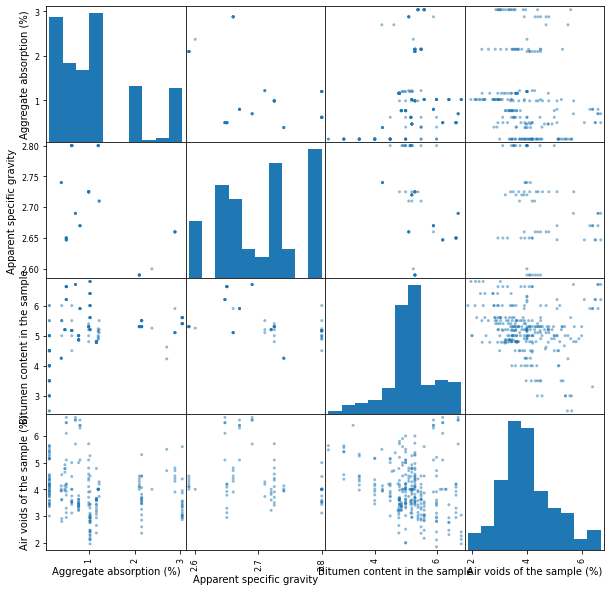

In [10]:
scatter_matrix(dfAirVoids[['Aggregate absorption (%)', 'Apparent specific gravity', 'Bitumen content in the sample', 'Air voids of the sample (%)']], figsize=(10, 10))
plt.show()

It is possible to see a negative correlation between $\color{red}{\text{Bitumen Content}}$  and $\color{red}{\text{Air Voids}}$. This makes sense because higher bitumen quantities will fill more voids in the mixture.

Among the categorical variables, we will initially focus on the general ones that might have an effect on air voids: $\color{red}{\text{Aggregate type}}$, $\color{red}{\text{Filler used}}$ and $\color{red}{\text{Bitumen Grade}}$

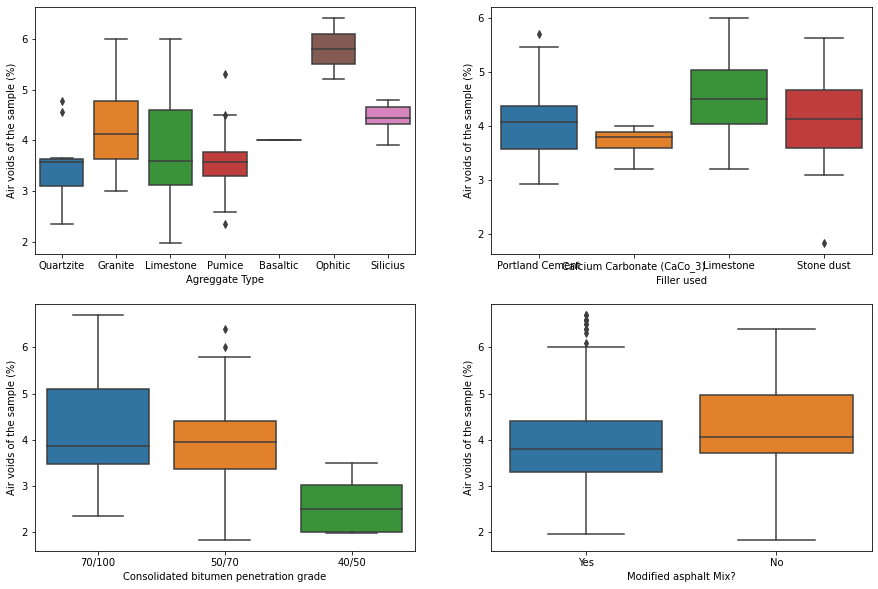

In [11]:
displayBoxPlotGraphs(dataFrame = dfAirVoids, propertyOfInterest = "Air voids of the sample (%)", columnName1 = "Agreggate Type", columnName2 = "Filler used", columnName3 = "Consolidated bitumen penetration grade", columnName4 = "Modified asphalt Mix?")

Within the  $\color{red}{\text{Aggregate type}}$, although it exists differences -especially with the Ophitic- this data migh not be robust enough due to the sample size of this type of aggregate. It happens the same with the  $\color{red}{\text{Bitumen type}}$, where only  $\color{purple}{\text{5}}$ observations used the 40/50 bitumen. The  $\color{red}{\text{addition of plastic}}$ seems to have not strong influence in the air voids.

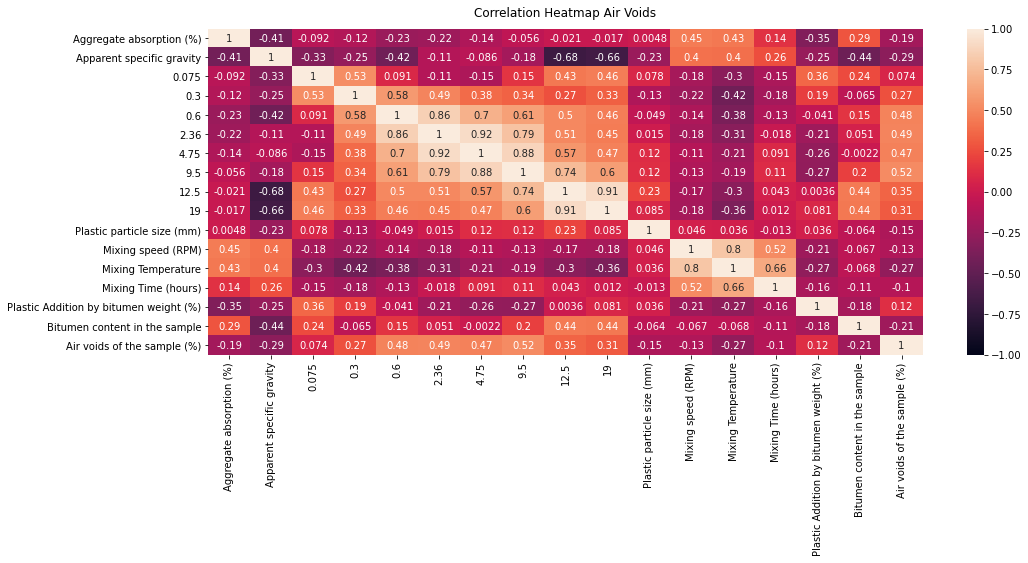

In [12]:
#CORRELATION:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dfAirVoids.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap Air Voids', fontdict={'fontsize':12}, pad=12);

###  3.2 Modified mixtures

In [13]:
dfAirVoidsModvsUnmod = dfAirVoids [['Modified asphalt Mix?', 'Air voids of the sample (%)']]
dfAirVoidsModvsUnmod.groupby(['Modified asphalt Mix?'], as_index=False).describe()

Air voids of the sample (%)                                                  \
                        count      mean       std   min     25%   50%     75%   
0                        60.0  4.250667  0.838416  1.84  3.7125  4.05  4.9775   
1                       228.0  3.945439  1.017312  1.95  3.3000  3.80  4.4025   

        
   max  
0  6.4  
1  6.7

In [14]:
dfAirVoidsModified = dfAirVoids[dfAirVoids['Modified asphalt Mix?']=='Yes']
dfAirVoidsModified.describe(include = "all")

,Article ID,Global ID,Modified asphalt Mix?,Agreggate Type,Aggregate absorption (%),Apparent specific gravity,0.075,0.3,0.6,2.36,4.75,9.5,12.5,19,Filler used,Bitumen Type Penetration Grade,Consolidated bitumen penetration grade,New Plastic Type,Plastic pretreatment,Plastic shape,Plastic Size,Plastic particle size (mm),Mixing Process,Mixing speed (RPM),Mixing Temperature,Mixing Time (hours),Aggregates replacement ?,Bitumen replacement?,Filler replacement,Plastic Addition by bitumen weight (%),Property,Units,Bitumen content in the sample,Air voids of the sample (%)
count,228,228,228,162,184.000000,56.000000,201.000000,201.000000,198.000000,204.000000,204.000000,198.000000,195.000000,204.000000,93,228,228,204,228,228,188,178.000000,228,217.000000,225.000000,217.000000,228,228,228,228.000000,228,228,228.000000,228.000000
unique,25,228,1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6,3,7,2,3,4,NaN,2,NaN,NaN,NaN,2,2,1,NaN,1,1,NaN,NaN
top,19,308,Yes,Granite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portland Cement,50/70,50/70,PE,Physical,Shredded,Fine,NaN,Dry,NaN,NaN,NaN,No,No,No,NaN,Air Voids,%,NaN,NaN
freq,62,1,228,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,90,157,135,152,194,91,NaN,133,NaN,NaN,NaN,224,223,228,NaN,228,228,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.107011,2.699964,5.498607,13.097910,19.899646,35.367647,47.635294,66.047929,77.605846,90.962892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.386236,NaN,970.414747,63.022222,0.191982,NaN,NaN,NaN,19.023265,NaN,NaN,5.119316,3.945439
std,NaN,NaN,NaN,NaN,0.900510,0.066549,1.347934,3.518913,6.361360,7.213825,9.377532,10.582683,11.553937,7.531754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.155016,NaN,1589.783445,76.258632,0.399478,NaN,NaN,NaN,31.647967,NaN,NaN,0.817117,1.017312
min,NaN,NaN,NaN,NaN,0.130000,2.590000,2.190000,5.300000,10.070000,20.000000,24.000000,47.000000,66.630000,83.110000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.150000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.500000,NaN,NaN,2.500000,1.950000
25%,NaN,NaN,NaN,NaN,0.470000,2.650000,4.620000,10.150000,14.770000,29.850000,41.540000,59.850000,69.380000,84.460000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,3.000000,NaN,NaN,4.800000,3.300000
50%,NaN,NaN,NaN,NaN,0.990000,2.690000,5.280000,12.970000,19.780000,35.370000,46.150000,60.510000,69.380000,84.460000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,6.000000,NaN,NaN,5.170000,3.800000
75%,NaN,NaN,NaN,NaN,1.200000,2.740000,5.980000,14.470000,21.137500,36.895000,51.350000,70.480000,87.740000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,2000.000000,150.000000,0.250000,NaN,NaN,NaN,15.000000,NaN,NaN,5.500000,4.402500


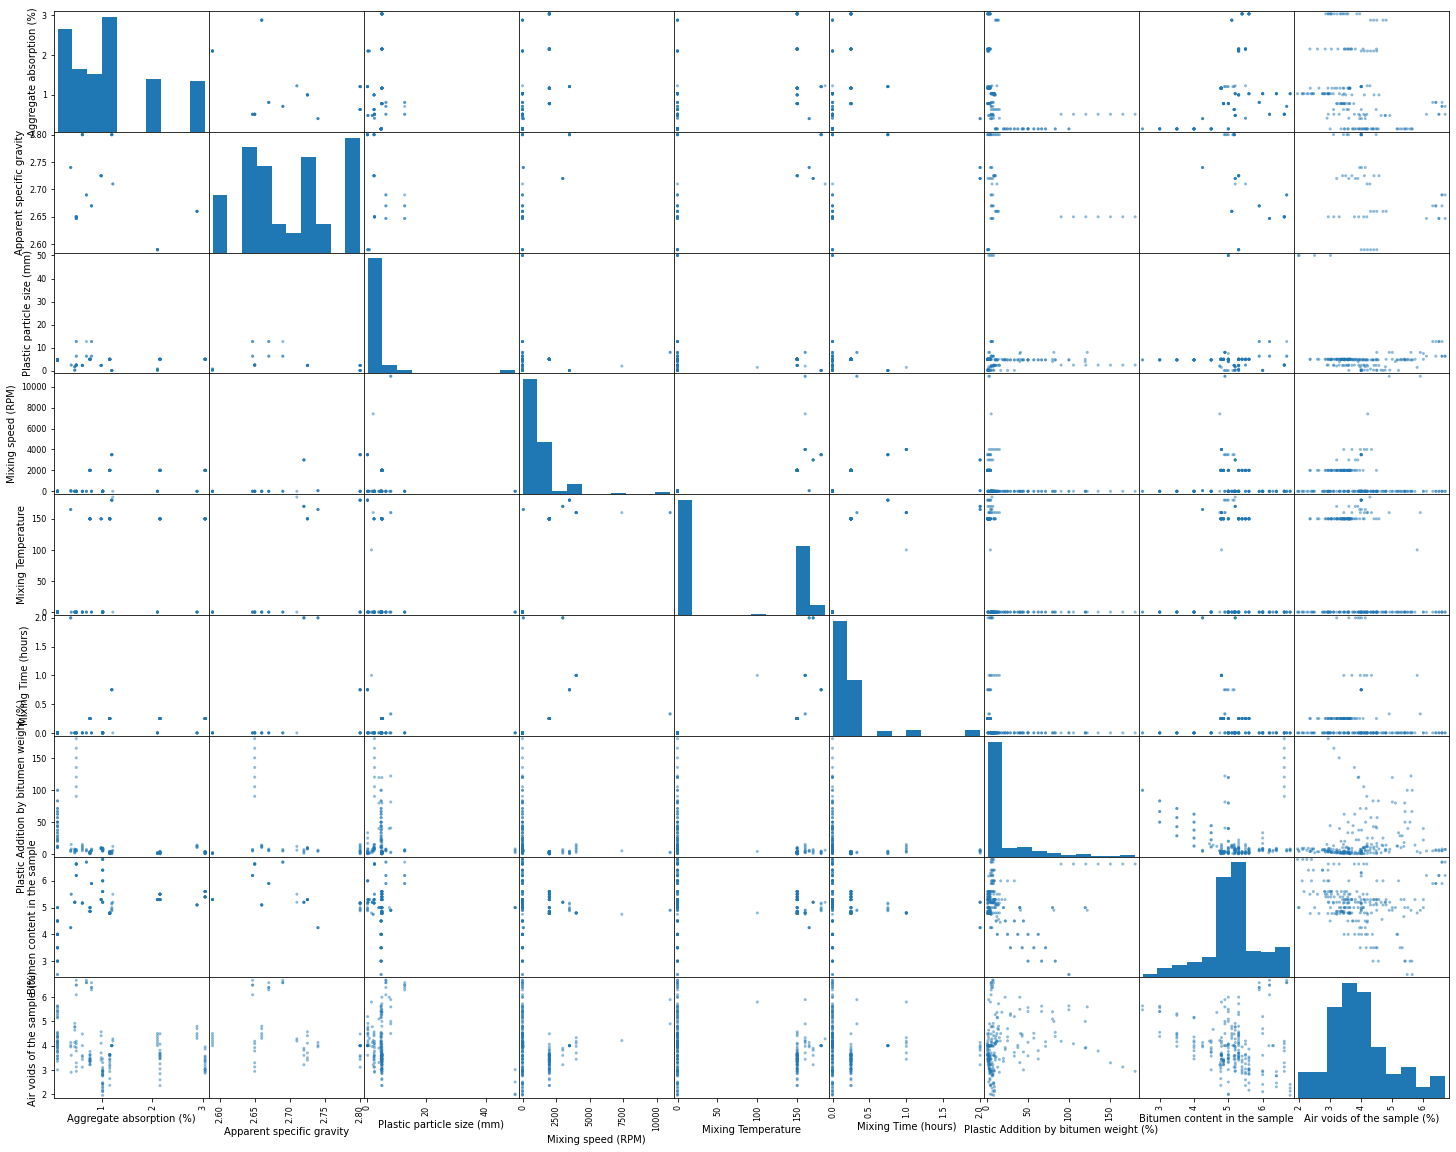

In [15]:
scatter_matrix(dfAirVoidsModified[columnsOfInteres], figsize=(25, 20))
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

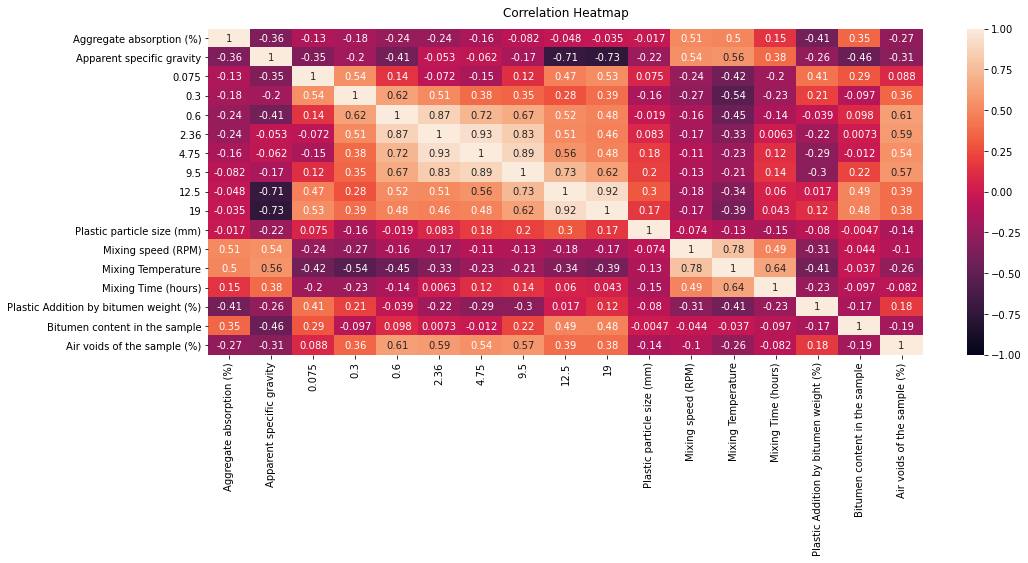

In [16]:
#CORRELATION:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dfAirVoidsModified.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

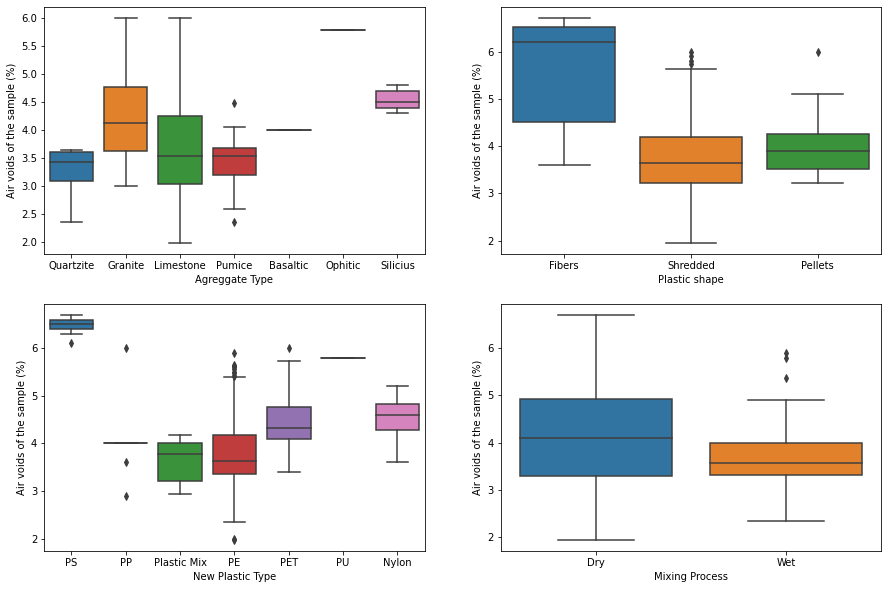

In [17]:
displayBoxPlotGraphs(dataFrame = dfAirVoidsModified, propertyOfInterest = "Air voids of the sample (%)", columnName1 = "Agreggate Type", columnName2 = "Plastic shape", columnName3 = "New Plastic Type", columnName4 = "Mixing Process")

Not much difference among dry and wet

###  3.3 Wet vs. Dry Mixing

In [18]:
dfAirVoidsWetvsDry = dfAirVoidsModified [['Mixing Process', 'Air voids of the sample (%)']]
dfAirVoidsWetvsDry.groupby(['Mixing Process'], as_index=False).describe()

Air voids of the sample (%)                                               \
                        count      mean       std   min   25%   50%    75%   
0                       133.0  4.162256  1.185640  1.95  3.30  4.10  4.920   
1                        95.0  3.641895  0.604626  2.35  3.32  3.57  3.985   

        
   max  
0  6.7  
1  5.9

C:\Users\cavs1\Anaconda3\envs\spyder\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cavs1\Anaconda3\envs\spyder\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cavs1\Anaconda3\envs\spyder\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


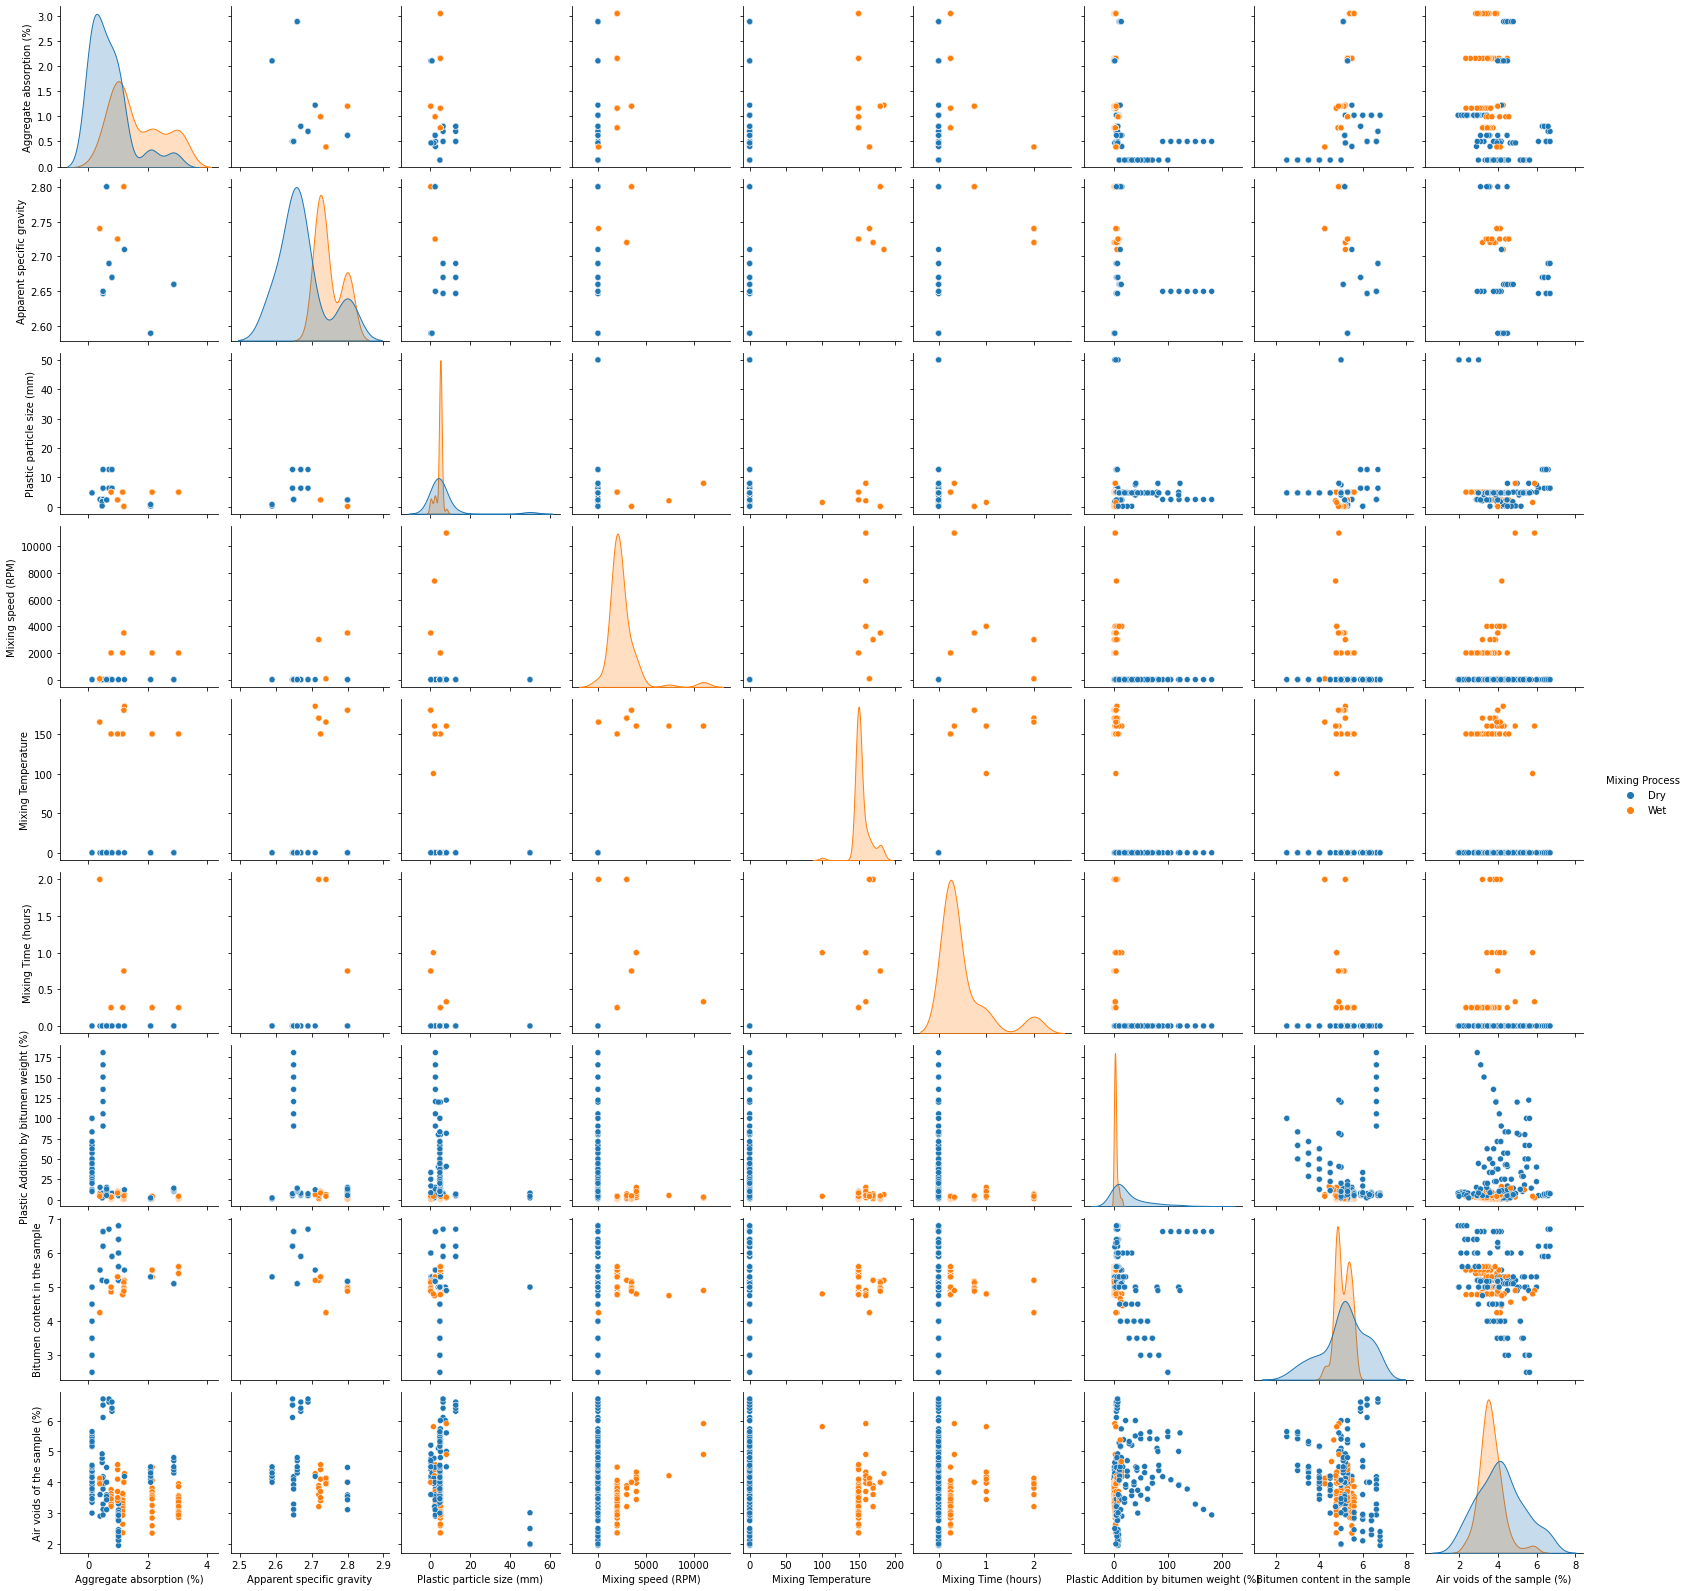

In [19]:
sns.pairplot(dfAirVoidsModified[columnsOfInteres+['Mixing Process']], hue="Mixing Process", height=2.5)

##  **Air Voids summary:**

*   There are missing values mainly in $\color{red}{\text{Apparent specific gravity}}$, $\color{red}{\text{Aggregate type}}$ and $\color{red}{\text{filler used}}$.
*   Total sample: # observations = 288, Mean = 4, Standard deviation = 0.98 
*   Sample with asphalt modified: # observations = 228, Mean = 3.94, Standard deviation = 1.017
*   It seems that there will be a strong correlation with $\color{red}{\text{Aggregates gradation}}$.
*   Dry vs. Wet:
    *   Not strong difference between dry and wet.
    *   Mean in wet = 3.64, Mean in dry = 4.16.


## 4. 🛀 Data Pre-processing

In [23]:
dfAirVoids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 1 to 305
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Article ID                              305 non-null    object 
 1   Global ID                               305 non-null    object 
 2   Modified asphalt Mix?                   305 non-null    object 
 3   Agreggate Type                          205 non-null    object 
 4   Aggregate absorption (%)                237 non-null    float64
 5   Apparent specific gravity               79 non-null     float64
 6   0.075                                   269 non-null    float64
 7   0.3                                     269 non-null    float64
 8   0.6                                     266 non-null    float64
 9   2.36                                    273 non-null    float64
 10  4.75                                    273 non-null    float6

*   Process for dealing with missing categorical values:

    1.  I will eliminate the rows with Nan values in the column $\color{red}{\text{New Plastic Type}}$. In total, there is 24 missing values, which represent 8.33% of the sample
    2.  Replace the 'N/a' value when there is no modifiation of the asphalt mix.

*   Process for dealing with missing numeric values:

    *   The imputer used was the multivariable imputer, and the estimator was the ExtraTreeRegressor ([link][1]).
    By using this estimator, I did not get any negative values among the missing features, and it presents a low MSE value.
    
[1]:https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#sphx-glr-auto-examples-impute-plot-iterative-imputer-variants-comparison-py  

In [24]:
#Categorical Variables
dfAirVoidsCleaned = dfAirVoids.drop(['Article ID', 
                                    'Global ID',
                                    'Modified asphalt Mix?',
                                    'Agreggate Type', 
                                    'Apparent specific gravity', 
                                    'Filler used', 
                                    'Bitumen Type Penetration Grade', 
                                    'Property', 
                                    'Units', 
                                    'Plastic Size' ], axis = 1)
dfAirVoidsCleaned = dfAirVoidsCleaned.replace('N/a', 0)
dfAirVoidsCleaned = dfAirVoidsCleaned.dropna(subset=['New Plastic Type'])
dfAirVoidsCleaned = pd.get_dummies(dfAirVoidsCleaned, columns=['New Plastic Type'], drop_first=False)
dfAirVoidsCleaned = pd.get_dummies(dfAirVoidsCleaned, drop_first=True)
dfAirVoidsCleaned = dfAirVoidsCleaned.drop(['New Plastic Type_0'], axis = 1)

In [19]:
#IMPUTATION OF MISSING VALUES
imputer = IterativeImputer (estimator = ExtraTreesRegressor(n_estimators=10, random_state = 123), max_iter=50,random_state = 123)
n = imputer.fit_transform(dfAirVoidsCleaned)
dfAirVoids_Effect_NoOutliers_Imputed = pd.DataFrame(n, columns = list(dfAirVoidsCleaned.columns))
print ('There is '+str(sum(n < 0 for n in dfAirVoidsCleanedImputed.values.flatten()))+' negative values in the new Dataframe')

There is 0 negative values in the new Dataframe


In [20]:
dfAirVoidsCleanedImputed['New Plastic Type_Nylon'] = dfAirVoidsCleanedImputed['New Plastic Type_Nylon'] * dfAirVoidsCleanedImputed['Plastic Addition by bitumen weight (%)']
dfAirVoidsCleanedImputed['New Plastic Type_PE'] = dfAirVoidsCleanedImputed['New Plastic Type_PE'] * dfAirVoidsCleanedImputed['Plastic Addition by bitumen weight (%)']
dfAirVoidsCleanedImputed['New Plastic Type_PET'] = dfAirVoidsCleanedImputed['New Plastic Type_PET'] * dfAirVoidsCleanedImputed['Plastic Addition by bitumen weight (%)']
dfAirVoidsCleanedImputed['New Plastic Type_PP'] = dfAirVoidsCleanedImputed['New Plastic Type_PP'] * dfAirVoidsCleanedImputed['Plastic Addition by bitumen weight (%)']
dfAirVoidsCleanedImputed['New Plastic Type_PS'] = dfAirVoidsCleanedImputed['New Plastic Type_PS'] * dfAirVoidsCleanedImputed['Plastic Addition by bitumen weight (%)']
dfAirVoidsCleanedImputed['New Plastic Type_PU'] = dfAirVoidsCleanedImputed['New Plastic Type_PU'] * dfAirVoidsCleanedImputed['Plastic Addition by bitumen weight (%)']
dfAirVoidsCleanedImputed['New Plastic Type_Plastic Mix'] = dfAirVoidsCleanedImputed['New Plastic Type_Plastic Mix'] * dfAirVoidsCleanedImputed['Plastic Addition by bitumen weight (%)']
dfAirVoidsCleanedImputed = dfAirVoidsCleanedImputed.drop(['Plastic Addition by bitumen weight (%)'], axis = 1)

In [25]:
dfAirVoidsCleanedImputed.columns

Index(['Aggregate absorption (%)', '0.075', '0.3', '0.6', '2.36', '4.75',
       '9.5', '12.5', '19', 'Plastic particle size (mm)', 'Mixing speed (RPM)',
       'Mixing Temperature', 'Mixing Time (hours)',
       'Bitumen content in the sample', 'Air voids of the sample (%)',
       'New Plastic Type_Nylon', 'New Plastic Type_PE', 'New Plastic Type_PET',
       'New Plastic Type_PP', 'New Plastic Type_PS', 'New Plastic Type_PU',
       'New Plastic Type_Plastic Mix',
       'Consolidated bitumen penetration grade_50/70',
       'Consolidated bitumen penetration grade_70/100',
       'Plastic pretreatment_Physical', 'Plastic pretreatment_Plastic Melted',
       'Plastic shape_Fibers', 'Plastic shape_Pellets',
       'Plastic shape_Shredded', 'Mixing Process_Dry', 'Mixing Process_Wet',
       'Aggregates replacement ?_Yes', 'Bitumen replacement?_Yes'],
      dtype='object')

In [26]:
 #Feature Scaling
 scaler = MinMaxScaler()
 dfAirVoidsCleanedImputedScaled = pd.DataFrame(scaler.fit_transform(dfAirVoidsCleanedImputed), columns = list(dfAirVoidsCleanedImputed.columns))
 dfAirVoidsCleanedImputedScaled.to_clipboard()

In [27]:
dfAirVoidsCleanedImputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Aggregate absorption (%)                       281 non-null    float64
 1   0.075                                          281 non-null    float64
 2   0.3                                            281 non-null    float64
 3   0.6                                            281 non-null    float64
 4   2.36                                           281 non-null    float64
 5   4.75                                           281 non-null    float64
 6   9.5                                            281 non-null    float64
 7   12.5                                           281 non-null    float64
 8   19                                             281 non-null    float64
 9   Plastic particle size (mm)                     281 non

## 5. Model Training

In [28]:
min = dfAirVoidsCleanedImputed['Air voids of the sample (%)'].min()
max = dfAirVoidsCleanedImputed['Air voids of the sample (%)'].max()
print('The min value is: '+str(min)+'. The max value is: '+str(max))

The min value is: 1.84. The max value is: 20.03


In [43]:
#Method that print the best parameters, R2 and MSE based on a grid search.
def printBestModelAdv (grid, estimator = n, advancedAnalysis = False):
    min = dfAirVoidsCleanedImputed['Air voids of the sample (%)'].min()
    max = dfAirVoidsCleanedImputed['Air voids of the sample (%)'].max()
    mse = -grid.best_score_
    print('Best Parameters:' , grid.best_params_)
    print('Best Test MSE: ' + str(mse))
    print('Std of the Test MSE:' + str(grid.cv_results_['std_test_neg_mean_squared_error'][grid.best_index_]))
    print('Best Test RMSE: ' +str(math.sqrt(mse)))
    print('Best Test scaled RMSE: ' +str((math.sqrt(mse)*(max-min))+min))
    print('Best Test scaled MSE: ' +str(((math.sqrt(mse)*(max-min))+min)**2)) 
    print('Best Test R2: ' + str(grid.cv_results_['mean_test_r2'][grid.best_index_]))
    if (advancedAnalysis):
        bestEstimator = estimator
        bestEstimator.fit(X_train, y_train)
        predictionsTrain = bestEstimator.predict(X_train)
        df = pd.DataFrame({'predictions':predictionsTrain, 'original': y_train})
        df.plot.hist(bins=10, alpha=0.5)
        unScaledDf = (df*(max-min))+min
        print (unScaledDf.describe())

In [30]:
X = dfAirVoidsCleanedImputedScaled.loc[:, dfAirVoidsCleanedImputedScaled.columns != 'Air voids of the sample (%)']
X.columns = X.columns.astype(str)
y = dfAirVoidsCleanedImputedScaled.loc[:,'Air voids of the sample (%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
cv = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = 123)

In [31]:
y_train_new = y_train.to_frame()
y_train_new['y_train_unscaled'] = (y_train*(max-min))+min

In [32]:
y_train_new.describe()

,Air voids of the sample (%),y_train_unscaled
count,224.000000,224.000000
mean,0.135845,4.311027
std,0.085246,1.550633
min,0.000000,1.840000
25%,0.090847,3.492500
50%,0.118747,4.000000
75%,0.161902,4.785000
max,1.000000,20.030000


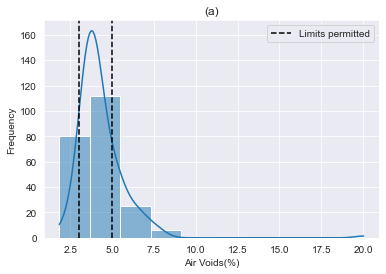

In [33]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
sns.histplot(x=y_train_new["y_train_unscaled"], bins=10, kde=True, ax = ax)
ax.set(xlabel='Air Voids(%)', ylabel='Frequency')
ax.axvline(x=3, label = 'Limits permitted', linestyle = '--', color='k')
ax.axvline(x=5, linestyle = '--', color='k')
ax.set_title('(a)')
ax.legend()
plt.show()

### 5.1 Model Evaluation
#### Linear Model

In [33]:
param_grid = {'fit_intercept': [True, False],
            'positive': [True, False]}
grid = GridSearchCV(LinearRegression(), param_grid, cv = cv, scoring=['neg_mean_squared_error', 'r2'], refit = 'neg_mean_squared_error', return_train_score= True)
grid.fit(X_train, y_train)
printBestModelAdv(grid) 

Best Parameters: {'fit_intercept': False, 'positive': True}
Best Test MSE: 0.021569658163831495
Std of the Test MSE:0.008127384473559741
Best Test RMSE: 0.1468661232682047
Best Test scaled RMSE: 2.553769359083475
Best Test scaled MSE: 6.521737939393622
Best Test R2: 0.3436646073471647


#### Lasso Linear Model


In [34]:
param_grid = {'alpha': [0.001,1, 10, 15, 30, 50, 100],
            'fit_intercept':[True, False],
            'positive': [True, False]}
grid = GridSearchCV(Lasso(), param_grid, cv=cv, scoring=['neg_mean_squared_error', 'r2'], refit = 'neg_mean_squared_error', return_train_score= True)
grid.fit(X_train, y_train)
printBestModelAdv(grid)

Best Parameters: {'alpha': 0.001, 'fit_intercept': True, 'positive': False}
Best Test MSE: 0.018511572503681017
Std of the Test MSE:0.007541935709089992
Best Test RMSE: 0.13605723980619708
Best Test scaled RMSE: 2.501238185458118
Best Test scaled MSE: 6.256192460393819
Best Test R2: 0.4453627719383209


#### Ridge linear regression model

In [35]:
param_grid = {'alpha': [7, 8, 10,100],
'fit_intercept': [True, False],
'solver': [ 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
grid = GridSearchCV(Ridge(), param_grid, cv=cv, scoring=['neg_mean_squared_error', 'r2'], refit = 'neg_mean_squared_error')
grid.fit(X_train, y_train)
printBestModelAdv(grid)

Best Parameters: {'alpha': 7, 'fit_intercept': True, 'solver': 'lsqr'}
Best Test MSE: 0.021094932490171022
Std of the Test MSE:0.008559222323861854
Best Test RMSE: 0.14524094632771786
Best Test scaled RMSE: 2.545870999152709
Best Test scaled MSE: 6.481459144326812
Best Test R2: 0.3800787132979735


#### Linear Elastic Net

In [36]:
param_grid = {'alpha': [0.01,1,2,3,4],
'fit_intercept': [True, False]}
grid = GridSearchCV(ElasticNet(), param_grid, cv=cv, scoring=['neg_mean_squared_error', 'r2'], refit = 'neg_mean_squared_error')
grid.fit(X_train, y_train)
printBestModelAdv(grid)

Best Parameters: {'alpha': 0.01, 'fit_intercept': False}
Best Test MSE: 0.022799467922929702
Std of the Test MSE:0.008646817544954695
Best Test RMSE: 0.15099492681189558
Best Test scaled RMSE: 2.5738353443058126
Best Test scaled MSE: 6.624628379597821
Best Test R2: 0.32015899879843696


#### Polynomial Model

In [37]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': [2,3],
'linearregression__fit_intercept': [True, False],
'linearregression__positive':[True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=cv, scoring=['neg_mean_squared_error', 'r2'], refit = 'neg_mean_squared_error')
grid.fit(X_train, y_train)
printBestModelAdv(grid)

Best Parameters: {'linearregression__fit_intercept': False, 'linearregression__positive': True, 'polynomialfeatures__degree': 2}
Best Test MSE: 0.020725801625515215
Std of the Test MSE:0.008037471056258752
Best Test RMSE: 0.14396458462245224
Best Test scaled RMSE: 2.539667881265118
Best Test scaled MSE: 6.449912947129653
Best Test R2: 0.3572234604033163


#### Lasso Polynomial Model

In [38]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), Lasso(**kwargs))

param_grid = {'polynomialfeatures__degree': [2,3],
            'lasso__alpha': [1,2, 3, 10, 15, 30],
            'lasso__fit_intercept':[True, False],
            'lasso__positive': [True, False],
            'lasso__max_iter': [2000,3000, 3500]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=cv, scoring=['neg_mean_squared_error', 'r2'], refit = 'neg_mean_squared_error', return_train_score= True)
grid.fit(X_train, y_train)
printBestModelAdv(grid)

Best Parameters: {'lasso__alpha': 1, 'lasso__fit_intercept': True, 'lasso__max_iter': 2000, 'lasso__positive': True, 'polynomialfeatures__degree': 2}
Best Test MSE: 0.03782886251897113
Std of the Test MSE:0.01359459121980216
Best Test RMSE: 0.19449643317801776
Best Test scaled RMSE: 2.7852526652451663
Best Test scaled MSE: 7.757632409255303
Best Test R2: -0.06082768278287937


#### Ridge polynomial regression

In [39]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), Ridge(**kwargs))

param_grid = {'polynomialfeatures__degree': [2,3],
'ridge__alpha':[20,30,50, 60],
'ridge__fit_intercept': [True, False],
'ridge__solver': [ 'lsqr', 'cholesky', 'sparse_cg', 'auto']}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=cv, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error')
grid.fit(X_train, y_train)
printBestModelAdv(grid)

Best Parameters: {'polynomialfeatures__degree': 3, 'ridge__alpha': 20, 'ridge__fit_intercept': True, 'ridge__solver': 'sparse_cg'}
Best Test MSE: 0.016915757472488347
Std of the Test MSE:0.007777749168631296
Best Test RMSE: 0.13006059154289723
Best Test scaled RMSE: 2.4720944748984808
Best Test scaled MSE: 6.111251092823595
Best Test R2: 0.4859567402190676


#### Support vector regression

In [40]:
param_grid = {
    'kernel':['linear','rbf', 'sigmoid', 'poly'],
    'degree':[2,3,4],
    'C':[0.01,1,5,10],
    'epsilon':[0.1,0.2, 1, 1.5]
}
grid = GridSearchCV(SVR(), param_grid, cv=cv, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error')
grid.fit(X_train, y_train)
printBestModelAdv(grid)

Best Parameters: {'C': 5, 'degree': 2, 'epsilon': 0.1, 'kernel': 'rbf'}
Best Test MSE: 0.016450360872803556
Std of the Test MSE:0.007113157905519582
Best Test RMSE: 0.12825896020474967
Best Test scaled RMSE: 2.4633385465950837
Best Test scaled MSE: 6.068036795141179
Best Test R2: 0.4814125014686278


#### Decision tree regressor

In [41]:
param_grid = {
    'max_depth':[1,2,3,5,10,30],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[0.4,1,2]
}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=cv, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error')
grid.fit(X_train, y_train)
printBestModelAdv(grid)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Test MSE: 0.014553297559583163
Std of the Test MSE:0.008264823262381238
Best Test RMSE: 0.1206370488680122
Best Test scaled RMSE: 2.4262960574985395
Best Test scaled MSE: 5.8869125586329565
Best Test R2: 0.5504380047081223


#### Random Forest


Best Parameters: {'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': True}
Best Test MSE: 0.012393210669959263
Std of the Test MSE:0.006446651020935926
Best Test RMSE: 0.11132479809080843
Best Test scaled RMSE: 2.381038518721329
Best Test scaled MSE: 5.669344427634662
Best Test R2: 0.6186195979365077
       predictions    original
count   211.000000  211.000000
mean      4.094006    4.097867
std       0.815178    0.942785
min       2.445253    1.840000
25%       3.544814    3.500000
50%       4.007115    3.970000
75%       4.483541    4.505000
max       6.550227    6.700000


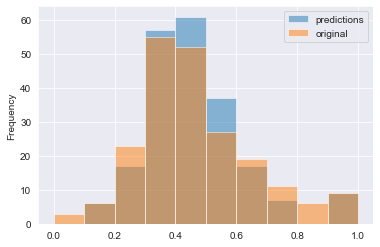

In [42]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
grid = RandomizedSearchCV(RandomForestRegressor(), 
                        random_grid, 
                        cv=cv, 
                        scoring=['neg_mean_squared_error', 'r2'], 
                        refit='neg_mean_squared_error', 
                        n_iter=10,
                        )
grid.fit(X_train, y_train)
printBestModelAdv(grid, RandomForestRegressor(**grid.best_params_), True)

#### Extra tree regressor

Best Parameters: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': False}
Best Test MSE: 0.012237609086140527
Std of the Test MSE:0.006638265043540851
Best Test RMSE: 0.11062372750066111
Best Test scaled RMSE: 2.377631315653213
Best Test scaled MSE: 5.653130673174829
Best Test R2: 0.6125898145033869
       predictions    original
count   211.000000  211.000000
mean      4.097867    4.097867
std       0.942000    0.942785
min       1.840000    1.840000
25%       3.505000    3.500000
50%       3.965000    3.970000
75%       4.500000    4.505000
max       6.700000    6.700000


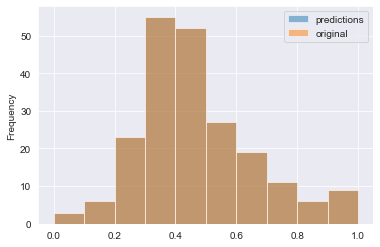

In [43]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}
grid = RandomizedSearchCV(ExtraTreesRegressor(), param_grid, cv=cv, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error', n_iter=10)
grid.fit(X_train, y_train)
printBestModelAdv(grid, ExtraTreesRegressor(**grid.best_params_), True)

#### XG Boost Regressor

In [44]:
XGBoostModel = XGBRegressor(random_state=123)
scores = cross_val_score(XGBoostModel, X_train, y_train , scoring = 'neg_mean_squared_error', cv = cv)
scores = np.absolute(scores)
print (scores.mean())

0.011532817740004768


In [45]:
XGModel = XGBRegressor(random_state = 1,
                        eta = 0.1,
                        max_depth = 6,
                        min_child_weight =1,
                        max_delta_step = 0,
                        gamma = 0,
                        subsample = 1,
                        colsample_bytree = 1,
                        colsample_bylevel = 1,
                        colsample_bynode = 1, 
                        reg_lambda = 13,
                        alpha = 0,
                        tree_method = 'approx',
                        n_estimators = 100)
modelEvaluation(XGModel, 'XGModel')

NameError: name 'modelEvaluation' is not defined

In [ ]:
param_grid = {
    'eta':[0.09],
    'max_depth':[5],
    'max_delta_step': [9],
    'gamma' : [0.001],
    'lambda' : [8],
    'alpha' : [0],
    'n_estimators': [100,300,500,1000]
}
grid =GridSearchCV(XGBRegressor(random_state=123), param_grid, cv=cv, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error')
grid.fit(X_train, y_train)
printBestModelAdv(grid, XGBRegressor(**grid.best_params_), True)

In [ ]:
X_train.columns

In [ ]:
X_train2 = X_train.copy()
X_train2.rename(columns={'0.075':'Grad. Sieve size 0.075', '0.3':'Grad. Sieve size 0.3', '0.6':'Grad. Sieve size 0.6', '2.36':'Grad. Sieve size 2.36',                                '4.75':'Grad. Sieve size 4.75','9.5':'Grad. Sieve size 9.5', '12.5':'Grad. Sieve size 12.5', '19':'Grad. Sieve size 19', 
                        'Plastic particle size (mm)':'Plastic size', 'Mixing speed (RPM)':'Mixing speed',
                        'Mixing Time (hours)':'Mixing Time',
                        'Bitumen content in the sample':'Bitumen content', 'New Plastic Type_Nylon':'Plastic Type_Nylon',
                        'New Plastic Type_PE':'Plastic Type_PE', 'New Plastic Type_PET':'Plastic Type_PET', 'New Plastic Type_PP':'Plastic Type_PP',
                        'New Plastic Type_PS':'Plastic Type_PS', 'New Plastic Type_PU':'Plastic Type_PU',
                        'New Plastic Type_Plastic Mix':'Plastic Type_Plastic Mix',
                        'Consolidated bitumen penetration grade_50/70':'Bitumen grade_50/70',
                        'Consolidated bitumen penetration grade_70/100':'Bitumen grade_70/100',
       }, inplace=True)

In [ ]:
#Graph employed for selecting important features during tunning
XGBoostModel = XGBRegressor(reg_alpha=0, eta=0.09, gamma=0.001, reg_lambda=8, max_delta_step=9, n_estimators=300, random_state=123)
XGBoostModel.fit(X_train2,y_train)
ax = plot_importance(XGBoostModel, height=0.8, importance_type='weight', show_values=False, title=None, max_num_features = 20)
fig = ax.figure
plt.xlabel('Weight', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.title('(a)',fontsize= 22)
fig.set_size_inches(8,8)

*The Gain is the most relevant attribute to interpret the relative importance of each feature.* [Reference](https://towardsdatascience.com/be-careful-when-interpreting-your-features-importance-in-xgboost-6e16132588e7)

## 6. Best Model Tunning

In [ ]:
X_train.columns = X_train.columns.astype(str)
cv = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = 123)

### 6.1. Feature selection

In [ ]:
features_MSE = {}
def addMSE (columns, string):
    cv_results = cross_validate(XGBRegressor(reg_alpha=0, 
                                eta=0.09, 
                                gamma=0.001, 
                                reg_lambda=8, 
                                max_delta_step=9, 
                                n_estimators=300, 
                                random_state = 123), X_train[columns], y_train, cv = cv, scoring = ['neg_mean_squared_error'])
    MSE = np.average(-cv_results['test_neg_mean_squared_error'])
    features_MSE[string] = MSE

In [ ]:
X_train.columns

In [ ]:
addMSE(['Bitumen content in the sample'], 'Bitumen cont.')

In [ ]:
addMSE(['Bitumen content in the sample', 
       'New Plastic Type_Nylon','New Plastic Type_PE', 'New Plastic Type_PET', 'New Plastic Type_PP',
       'New Plastic Type_PS', 'New Plastic Type_PU','New Plastic Type_Plastic Mix'], 
       'Bitumen cont. \n Plastic Type')

In [ ]:
addMSE(['Bitumen content in the sample', 
       'New Plastic Type_Nylon','New Plastic Type_PE', 'New Plastic Type_PET', 'New Plastic Type_PP',
       'New Plastic Type_PS', 'New Plastic Type_PU','New Plastic Type_Plastic Mix', 
       'Aggregate absorption (%)'], 
       'Bitumen cont. \n Plastic Type \n Aggregates abs.')

In [ ]:
addMSE(['Bitumen content in the sample', 
       'New Plastic Type_Nylon','New Plastic Type_PE', 'New Plastic Type_PET', 'New Plastic Type_PP',
       'New Plastic Type_PS', 'New Plastic Type_PU','New Plastic Type_Plastic Mix', 
       'Aggregate absorption (%)', 'Plastic particle size (mm)'], 
       'Bitumen cont. \n Plastic Type \n Aggregates abs. \n Plastic size')

In [ ]:
addMSE(['Bitumen content in the sample', 
       'New Plastic Type_Nylon','New Plastic Type_PE', 'New Plastic Type_PET', 'New Plastic Type_PP',
       'New Plastic Type_PS', 'New Plastic Type_PU','New Plastic Type_Plastic Mix', 
       'Aggregate absorption (%)', 'Plastic particle size (mm)',
       '0.075', '0.3', '0.6', '2.36', '4.75','9.5', '12.5', '19'], 
       'Bitumen cont. \n Plastic Type \n Aggregates abs. \n Plastic size \n Gradation')

In [ ]:
addMSE(['Bitumen content in the sample', 
       'New Plastic Type_Nylon','New Plastic Type_PE', 'New Plastic Type_PET', 'New Plastic Type_PP',
       'New Plastic Type_PS', 'New Plastic Type_PU','New Plastic Type_Plastic Mix', 
       'Aggregate absorption (%)', 'Plastic particle size (mm)',
       '0.075', '0.3', '0.6', '2.36', '4.75','9.5', '12.5', '19',
       'Mixing speed (RPM)'], 
       'Bitumen cont. \n Plastic Type \n Aggregates abs. \n Plastic size \n Gradation \n Mixing Speed')

In [ ]:
addMSE(['Bitumen content in the sample', 
       'New Plastic Type_Nylon','New Plastic Type_PE', 'New Plastic Type_PET', 'New Plastic Type_PP',
       'New Plastic Type_PS', 'New Plastic Type_PU','New Plastic Type_Plastic Mix', 
       'Aggregate absorption (%)', 'Plastic particle size (mm)',
       '0.075', '0.3', '0.6', '2.36', '4.75','9.5', '12.5', '19',
       'Mixing speed (RPM)',
       'Consolidated bitumen penetration grade_50/70','Consolidated bitumen penetration grade_70/100',], 
       'Bitumen cont. \n Plastic Type \n Aggregates abs. \n Plastic size \n Gradation \n Mixing Speed \n Bitumen type')

In [ ]:
addMSE(['Bitumen content in the sample', 
       'New Plastic Type_Nylon','New Plastic Type_PE', 'New Plastic Type_PET', 'New Plastic Type_PP',
       'New Plastic Type_PS', 'New Plastic Type_PU','New Plastic Type_Plastic Mix', 
       'Aggregate absorption (%)', 'Plastic particle size (mm)',
       '0.075', '0.3', '0.6', '2.36', '4.75','9.5', '12.5', '19',
       'Mixing speed (RPM)',
       'Consolidated bitumen penetration grade_50/70','Consolidated bitumen penetration grade_70/100',
       'Plastic shape_Fibers', 'Plastic shape_Pellets','Plastic shape_Shredded'], 
       'Bitumen cont. \n Plastic Type \n Aggregates abs. \n Plastic size \n Gradation \n Mixing Speed \n Bitumen type \n Plastic shape')

In [ ]:
addMSE(['Aggregate absorption (%)', '0.075', '0.3', '0.6', '2.36', '4.75',
       '9.5', '12.5', '19', 'Plastic particle size (mm)', 'Mixing speed (RPM)',
       'Mixing Temperature', 'Mixing Time (hours)',
       'Bitumen content in the sample', 'New Plastic Type_Nylon',
       'New Plastic Type_PE', 'New Plastic Type_PET', 'New Plastic Type_PP',
       'New Plastic Type_PS', 'New Plastic Type_PU',
       'New Plastic Type_Plastic Mix',
       'Consolidated bitumen penetration grade_50/70',
       'Consolidated bitumen penetration grade_70/100',
       'Plastic pretreatment_Physical', 'Plastic pretreatment_Plastic Melted',
       'Plastic shape_Fibers', 'Plastic shape_Pellets',
       'Plastic shape_Shredded', 'Mixing Process_Dry', 'Mixing Process_Wet',
       'Aggregates replacement ?_Yes', 'Bitumen replacement?_Yes'], 
       'All Features')

In [ ]:
 plt.rcParams["figure.figsize"] = (20,5)
 plt.plot(features_MSE.keys(), features_MSE.values(), marker = '*') 
 plt.ylim(ymin = 0)
 plt.axvline(x='Bitumen cont. \n Plastic Type \n Aggregates abs. \n Plastic size \n Gradation \n Mixing Speed \n Bitumen type', ymin=0, ymax=1, color = 'k', ls = '--' , label='Selected model')
 plt.ylabel('MSE', fontsize = 20)
 plt.xlabel('Features included in the model', fontsize = 20)
 plt.xticks(fontsize= 13) 
 plt.title('(b)', fontsize=22)
 plt.legend()
 plt.show()

## 6.2 Tunning

In [ ]:
X_train =  X_train[['Bitumen content in the sample', 
       'New Plastic Type_Nylon','New Plastic Type_PE', 'New Plastic Type_PET', 'New Plastic Type_PP',
       'New Plastic Type_PS', 'New Plastic Type_PU','New Plastic Type_Plastic Mix', 
       'Aggregate absorption (%)', 'Plastic particle size (mm)',
       '0.075', '0.3', '0.6', '2.36', '4.75','9.5', '12.5', '19',
       'Mixing speed (RPM)',
       'Consolidated bitumen penetration grade_50/70','Consolidated bitumen penetration grade_70/100',
        ]]
X_test = X_test [['Bitumen content in the sample', 
       'New Plastic Type_Nylon','New Plastic Type_PE', 'New Plastic Type_PET', 'New Plastic Type_PP',
       'New Plastic Type_PS', 'New Plastic Type_PU','New Plastic Type_Plastic Mix', 
       'Aggregate absorption (%)', 'Plastic particle size (mm)',
       '0.075', '0.3', '0.6', '2.36', '4.75','9.5', '12.5', '19',
       'Mixing speed (RPM)',
       'Consolidated bitumen penetration grade_50/70','Consolidated bitumen penetration grade_70/100',
        ]]

### 6.3 Final model evaluation on test set

In [ ]:
def modelEvaluation (model, Title):
    min = dfAirVoidsCleanedImputed['Air voids of the sample (%)'].min()
    max = dfAirVoidsCleanedImputed['Air voids of the sample (%)'].max()
    #Model Fitting
    model.fit(X_train, y_train)
    predictions_test = model.predict(X_test)
    #Model Evaluation
    r2_test = r2_score(y_test, predictions_test)
    mse_test = mean_squared_error(y_test, predictions_test)
    rmse_test_unscaled = (math.sqrt(mse_test)*(max-min))+min
    plt.figure(figsize=(7,7))
    #Model Plotting
    plt.scatter(y_test, predictions_test, c='crimson')
    plt.plot([(1,1), (0,0)], [(1,1), (0,0)], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.xlim (0,1)
    plt.ylim (0,1)
    plt.ylabel('Predictions - ' + Title, fontsize=18)
    plt.annotate('R2 = '+str(round(r2_test,3)), xy = (0.6,0.3), fontweight = 'bold', fontsize = 'xx-large')
    plt.annotate('RMSE = '+str(round(rmse_test_unscaled,3)), xy = (0.6,0.25), fontweight = 'bold', fontsize = 'xx-large')
    plt.show()
    return predictions_test

In [ ]:
XGModel = XGBRegressor(reg_alpha=0, eta=0.09, gamma=0.001, reg_lambda=8, max_delta_step=9, n_estimators=300, random_state = 1)
predictions_XGModel = modelEvaluation(XGModel, 'XGModel')

P-value is higher than 0.05, so it the come from the same distibuition

In [ ]:
XGModel.get_params

In [ ]:
extraTreeModel = ExtraTreesRegressor(n_estimators=600, min_samples_split=2,min_samples_leaf=1, max_features='auto', max_depth=30, bootstrap=True, random_state=123)
predictions_ExtraTrees = modelEvaluation(extraTreeModel, 'Extra Trees model')

In [ ]:
stats.ks_2samp(y_test, predictions_XGModel, alternative='two-sided')

In [ ]:
RFModel = RandomForestRegressor(n_estimators=1000,min_samples_split=2, min_samples_leaf=2, max_features='auto', max_depth=50, bootstrap=True, random_state=123)
predictions_RandomForest = modelEvaluation(RFModel, 'Random Forest Model')

## 6.3 ANOVA Analysis

In [ ]:
df_predictions = y_test.to_frame(name='real_Y')
df_predictions['XGModel_predictions'] = predictions_XGModel
df_predictions['ExtraTrees_predictions'] = predictions_ExtraTrees
df_predictions['RandomForest_predictions'] = predictions_RandomForest

In [ ]:
#Test for evakuating the normality of the data (Omnibus test)
def normalityTest (model, data, alpha=0.05):
    k2, p = stats.normaltest(data)
    if p > alpha:
        print ('The ' + model + ' is probably Gaussian. p-value = ' + str(p))
    else:
        print ('The ' + model +' is not probably Gaussian. p-value = '+ str(p))

### Normality evaluation

In [ ]:
normalityTest(data = df_predictions['real_Y'], model = 'real values')
normalityTest(data = df_predictions['RandomForest_predictions'], model = 'Random Forest')
normalityTest(data = df_predictions['XGModel_predictions'], model = 'XG model')
normalityTest(data = df_predictions['ExtraTrees_predictions'], model = 'Extra trees')

### Variance homogeneity (Bartletts's test) 

In [ ]:
stal, p = stats.bartlett(df_predictions['real_Y'], df_predictions['RandomForest_predictions'], df_predictions['XGModel_predictions'], df_predictions['ExtraTrees_predictions'])
if p > 0.05:
    print('There is not sufficient evidence to say that the variance of the real values and the predictors are differents. The p-value is ' + str(p))
else:
    print('There is non-homogeneity in the variance. The p-value is ' + str(p))

In [ ]:
stats.f_oneway(df_predictions['real_Y'],
               df_predictions['RandomForest_predictions'],
               df_predictions['XGModel_predictions'],
               df_predictions['ExtraTrees_predictions'])

In [ ]:
stats.kruskal(df_predictions['real_Y'], df_predictions['RandomForest_predictions'], 
				df_predictions['XGModel_predictions'],df_predictions['ExtraTrees_predictions'])

There is not statistical differences between the predicted values of the three models and the observed values

## 6.4 Goodness of fit Analysis

In [ ]:
def evaluateGOF (y_real, model_predictions, Model, alpha = 0.05):
    stat, p_value  = stats.ks_2samp(y_real, model_predictions, alternative='two-sided')
    if p_value > 0.05:
        print ('The real values and the predictions of '+Model+' come from the same distribution according to the Kolmogorov-Smirnov test. The p-value is '+str(p_value))
    else:
        print ('The real values and the predictions of '+Model+'DO NOT come from the same distribution. The p-value is '+str(p_value))

In [ ]:
evaluateGOF(y_real=df_predictions['real_Y'], model_predictions=df_predictions['RandomForest_predictions'], Model = 'Random Forest')
evaluateGOF(y_real=df_predictions['real_Y'], model_predictions=df_predictions['XGModel_predictions'], Model = 'Boosted Tree')
evaluateGOF(y_real=df_predictions['real_Y'], model_predictions=df_predictions['ExtraTrees_predictions'], Model = 'Extra treees')

In [ ]:
sns.displot(df_predictions['real_Y'], kde=True, bins=10)

In [ ]:
df_predictions.to_clipboard()

# 🚨Air Voids Effect

In [33]:
dfAirVoidsEffect = returnDf('AirVoidsEffect')

In [34]:
dfAirVoidsEffectNoOutliers = eliminateOutliers(dfAirVoidsEffect, 'Effect(%)')

Initial dataframe size: (185, 37)
Final dataframe size: (177, 37)


In [35]:
dfAirVoidsEffectNoOutliers['Virgin Bitumen Penetration'] = pd.to_numeric(dfAirVoidsEffectNoOutliers['Virgin Bitumen Penetration'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [36]:
dfAirVoidsEffectNoOutliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 16 to 301
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Article ID                              177 non-null    object 
 1   Global ID                               177 non-null    object 
 2   Modified asphalt Mix?                   177 non-null    object 
 3   Agreggate Type                          127 non-null    object 
 4   Aggregate absorption (%)                137 non-null    float64
 5   Apparent specific gravity               32 non-null     float64
 6   0.075                                   150 non-null    float64
 7   0.3                                     150 non-null    float64
 8   0.6                                     147 non-null    float64
 9   2.36                                    153 non-null    float64
 10  4.75                                    153 non-null    float

## 🛀 Data Preprocessing

In [37]:
#Categorical Variables
dfAirVoidsEffectNoOutliers = dfAirVoidsEffectNoOutliers.drop(['Article ID', 
                                    'Global ID',
                                    'Modified asphalt Mix?',
                                    'Agreggate Type', 
                                    'Apparent specific gravity', 
                                    'Filler used', 
                                    'Bitumen Type Penetration Grade', 
                                    'Property', 
                                    'Units', 
                                    'Plastic Size',
                                    'Consolidated bitumen penetration grade' ], axis = 1)
dfAirVoidsEffectNoOutliers = dfAirVoidsEffectNoOutliers.dropna(subset=['New Plastic Type'])
dfAirVoidsEffectNoOutliers = pd.get_dummies(dfAirVoidsEffectNoOutliers, columns=['New Plastic Type'], drop_first=True)
dfAirVoidsEffectNoOutliers = pd.get_dummies(dfAirVoidsEffectNoOutliers, drop_first=True)

In [38]:
# Split X and Y
X = dfAirVoidsEffectNoOutliers[dfAirVoidsEffectNoOutliers.columns.difference(['Effect(%)','Air Voids Control (%)', 'Air voids of the sample (%)'])]
y = dfAirVoidsEffectNoOutliers[['Effect(%)']]
X.head()

,0.075,0.3,0.6,12.5,19,2.36,4.75,9.5,Aggregate absorption (%),Aggregates replacement ?_Yes,Bitumen content in the sample,Bitumen replacement?_Yes,Mixing Process_Wet,Mixing Temperature,Mixing Time (hours),Mixing speed (RPM),New Plastic Type_PE,New Plastic Type_PET,New Plastic Type_PP,New Plastic Type_PU,New Plastic Type_Plastic Mix,Plastic Addition by bitumen weight (%),Plastic particle size (mm),Plastic pretreatment_Plastic Melted,Plastic shape_Pellets,Plastic shape_Shredded,Virgin Bitumen Penetration
AirVoidsEffect ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
16,2.99,5.3,21.8,73.04,97.23,35.75,38.9,57.35,0.4,0,5.50,0,0,0.0,0.0,0.0,0,0,1,0,0,8.000000,2.5,0,0,1,69.0
17,2.99,5.3,21.8,73.04,97.23,35.75,38.9,57.35,0.4,0,5.50,0,0,0.0,0.0,0.0,0,0,1,0,0,15.000000,2.5,0,0,1,69.0
21,9.00,13.0,14.0,90.00,100.00,20.00,24.0,47.00,0.5,0,6.63,0,0,0.0,0.0,0.0,0,0,0,0,1,90.497738,2.5,0,0,1,64.0
22,9.00,13.0,14.0,90.00,100.00,20.00,24.0,47.00,0.5,0,6.63,0,0,0.0,0.0,0.0,0,0,0,0,1,105.580694,2.5,0,0,1,64.0
23,9.00,13.0,14.0,90.00,100.00,20.00,24.0,47.00,0.5,0,6.63,0,0,0.0,0.0,0.0,0,0,0,0,1,120.663650,2.5,0,0,1,64.0


In [39]:
#IMPUTATION OF MISSING VALUES
imputer = IterativeImputer (estimator = ExtraTreesRegressor(n_estimators=10, random_state = 123), max_iter=50,random_state = 123)
n = imputer.fit_transform(X)
X_Imputed = pd.DataFrame(n, columns = list(X.columns))
print ('There is '+ 
str(sum(n < 0 for n in X_Imputed.loc[:,X_Imputed.columns].values.flatten()))+
' negative values in the new DataFrame')

There is 0 negative values in the new DataFrame


In [41]:
# Feature engineering
X_Imputed['New Plastic Type_PE'] = X_Imputed['New Plastic Type_PE'] * X_Imputed['Plastic Addition by bitumen weight (%)']
X_Imputed['New Plastic Type_PET'] = X_Imputed['New Plastic Type_PET'] * X_Imputed['Plastic Addition by bitumen weight (%)']
X_Imputed['New Plastic Type_PP'] = X_Imputed['New Plastic Type_PP'] * X_Imputed['Plastic Addition by bitumen weight (%)']
X_Imputed['New Plastic Type_PU'] = X_Imputed['New Plastic Type_PU'] * X_Imputed['Plastic Addition by bitumen weight (%)']
X_Imputed['New Plastic Type_Plastic Mix'] = X_Imputed['New Plastic Type_Plastic Mix'] * X_Imputed['Plastic Addition by bitumen weight (%)']

In [42]:
# Scaling
 #Feature Scaling
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X_Imputed), columns = list(X_Imputed))
X.head()

,0.075,0.3,0.6,12.5,19,2.36,4.75,9.5,Aggregate absorption (%),Aggregates replacement ?_Yes,Bitumen content in the sample,Bitumen replacement?_Yes,Mixing Process_Wet,Mixing Temperature,Mixing Time (hours),Mixing speed (RPM),New Plastic Type_PE,New Plastic Type_PET,New Plastic Type_PP,New Plastic Type_PU,New Plastic Type_Plastic Mix,Plastic Addition by bitumen weight (%),Plastic particle size (mm),Plastic pretreatment_Plastic Melted,Plastic shape_Pellets,Plastic shape_Shredded,Virgin Bitumen Penetration
0,0.098644,0.000000,0.536351,0.186972,0.832934,0.52959,0.366544,0.24109,0.092784,0.0,0.534979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200,0.0,0.000000,0.041552,0.046185,0.0,0.0,1.0,0.500000
1,0.098644,0.000000,0.536351,0.186972,0.832934,0.52959,0.366544,0.24109,0.092784,0.0,0.534979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.0,0.000000,0.080334,0.046185,0.0,0.0,1.0,0.500000
2,0.839704,0.438746,0.179698,0.698432,0.998802,0.00000,0.000000,0.00000,0.127148,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.500000,0.498615,0.046185,0.0,0.0,1.0,0.395833
3,0.839704,0.438746,0.179698,0.698432,0.998802,0.00000,0.000000,0.00000,0.127148,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.583333,0.582179,0.046185,0.0,0.0,1.0,0.395833
4,0.839704,0.438746,0.179698,0.698432,0.998802,0.00000,0.000000,0.00000,0.127148,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.666667,0.665743,0.046185,0.0,0.0,1.0,0.395833


## 🧠Model Training


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
cv = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = 123)

In [45]:
#Method that print the best parameters, R2 and MSE based on a grid search.
def printBestModelAdv (grid):
    """ Return the best parameters in the grid with its corresponding MSE, RMSE and R^2

    Args:
        grid (gridSearchCv): This is the resultabn grid after using the method GridSearchCV()

    Print:
        Print the MSE, RMSE and R2
    """
    mse = -grid.best_score_
    rmse = math.sqrt(mse)
    r2 = grid.cv_results_['mean_test_r2'][grid.best_index_]
    print('Best Parameters:' , grid.best_params_)
    print('Best Test MSE: ' + str(mse))
    print('Std of the Test MSE:' + str(grid.cv_results_['std_test_neg_mean_squared_error'][grid.best_index_]))
    print('Best Test RMSE: ' +str(rmse))
    print('Best Test R2: ' + str(r2))

### Linear Model

In [46]:
param_grid = {'fit_intercept': [True, False],
            'positive': [True, False]}
grid = GridSearchCV(LinearRegression(), param_grid, cv = cv, scoring=['neg_mean_squared_error', 'r2'], refit = 'neg_mean_squared_error', return_train_score= True)
grid.fit(X_train, y_train)
printBestModelAdv(grid) 

Best Parameters: {'fit_intercept': True, 'positive': True}
Best Test MSE: 0.02945073358528624
Std of the Test MSE:0.01403529368352673
Best Test RMSE: 0.17161216036541885
Best Test R2: 0.2636828634449625


### Lasso Model

In [55]:
param_grid = {'alpha': [0.001,1, 10, 15, 30, 50, 100],
            'fit_intercept':[True, False],
            'positive': [True, False]}
grid = GridSearchCV(Lasso(), param_grid, cv=cv, scoring=['neg_mean_squared_error', 'r2'], refit = 'neg_mean_squared_error', return_train_score= True)
grid.fit(X_train, y_train)
printBestModelAdv(grid)

Best Parameters: {'alpha': 0.001, 'fit_intercept': True, 'positive': False}
Best Test MSE: 0.024633938936295972
Std of the Test MSE:0.01271096423598762
Best Test RMSE: 0.15695202749979362
Best Test R2: 0.3851144361487986


### Decision Tree

In [67]:
param_grid = {
    'max_depth':[1,2,3,5,10,30],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[0.4,1,2]
}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=cv, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error')
grid.fit(X_train, y_train)
printBestModelAdv(grid)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best Test MSE: 0.01614626980635029
Std of the Test MSE:0.009899586679148203
Best Test RMSE: 0.12706797317322052
Best Test R2: 0.6017591032077731


In [72]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
grid = RandomizedSearchCV(RandomForestRegressor(), 
                        random_grid, 
                        cv=cv, 
                        scoring=['neg_mean_squared_error', 'r2'], 
                        refit='neg_mean_squared_error', 
                        n_iter=10,
                        )
grid.fit(X_train, y_train['Effect(%)'])
printBestModelAdv(grid)

Best Parameters: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': True}
Best Test MSE: 0.012852759935798194
Std of the Test MSE:0.006687873437766271
Best Test RMSE: 0.11337001338889484
Best Test R2: 0.683720328461348


In [17]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}
grid = RandomizedSearchCV(ExtraTreesRegressor(), param_grid, cv=cv, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error', n_iter=10)
grid.fit(X_train, y_train['Effect(%)'])
printBestModelAdv(grid)

Best Parameters: {'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}
Best Test MSE: 0.01332572777692589
Std of the Test MSE:0.007343157192860332
Best Test RMSE: 0.11543711611490427
Best Test R2: 0.6729721949978905


### XGBoost

In [18]:
XGBoostModel = XGBRegressor(random_state=123)
scores = cross_val_score(XGBoostModel, X_train, y_train['Effect(%)'] , scoring = 'neg_mean_squared_error', cv = cv)
scores = np.absolute(scores)
print (scores.mean())

0.015610970187502677


In [ ]:
param_grid = {
    'eta':[None, 0.09],
    'max_depth':[None, 5],
    'max_delta_step': [None, 9],
    'gamma' : [None, 0.001],
    'lambda' : [None, 8],
    'alpha' : [None, 0],
    'n_estimators': [None,100,300,500,1000]
}
grid =GridSearchCV(XGBRegressor(random_state=123), param_grid, cv=cv, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error')
grid.fit(X_train, y_train['Effect(%)'])
printBestModelAdv(grid)

In [47]:
scores = cross_validate(XGBRegressor(random_state=123, n_estimators=500), X_train, y_train, cv=cv,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)

In [48]:
np.average(scores['test_r2'])

0.662762188913096

## 🔪SHAP Values

In [51]:
import shap

In [64]:
model = XGBRegressor().fit(X, y)

In [65]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


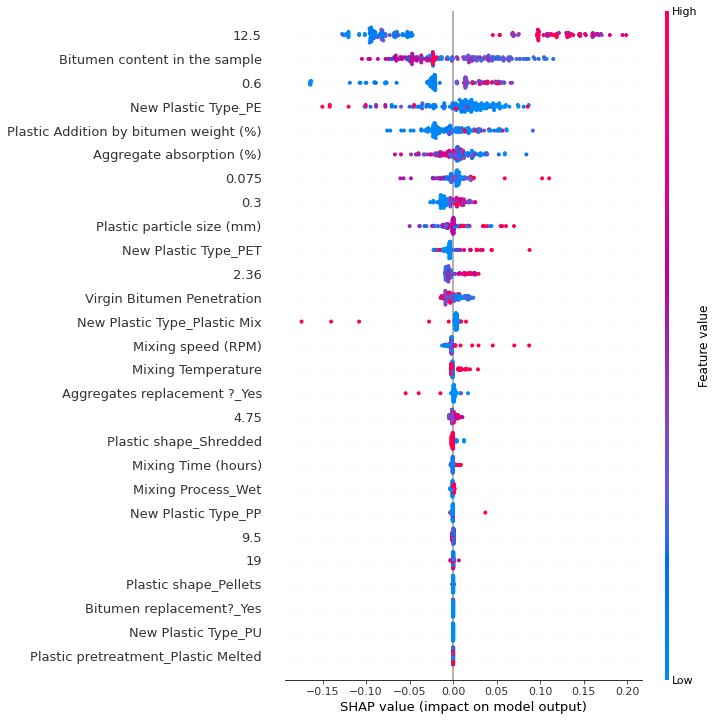

In [66]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values, max_display=28)

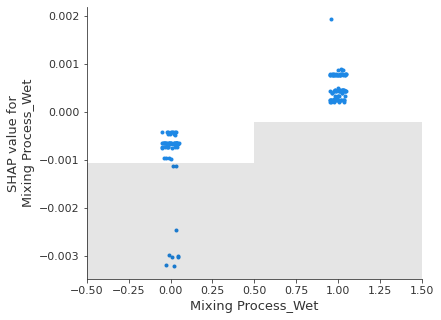

In [85]:
shap.plots.scatter(shap_values[:,'Mixing Process_Wet'])

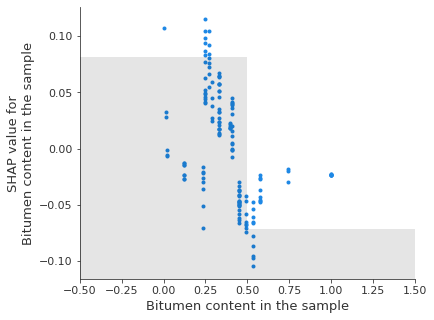

In [86]:
shap.plots.scatter(shap_values[:,'Bitumen content in the sample'])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


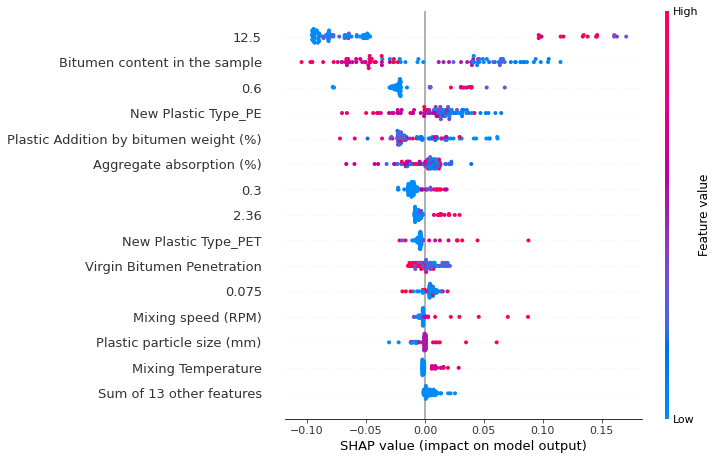

In [75]:
shap_values_wet = explainer(X[X['Mixing Process_Wet'] == 1])
# summarize the effects of all the features
shap.plots.beeswarm(shap_values_wet, max_display=15)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


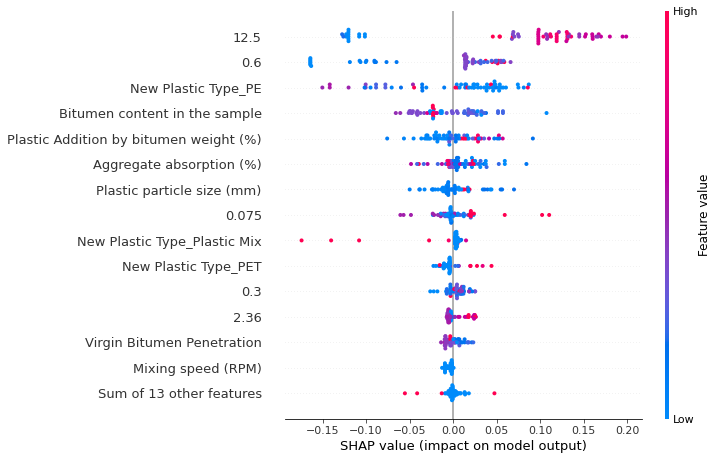

In [74]:
shap_values_dry = explainer(X[X['Mixing Process_Wet'] == 0])
# summarize the effects of all the features
shap.plots.beeswarm(shap_values_dry, max_display=15)